Support Vector Regression (SVR)

Load and Explore the Dataset


In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [ ]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [ ]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


Feature Scaling (Very Important for SVR)


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[['Years of Experience']].values
y = df[['Salary']].values

sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

Flatten y for SVR


In [ ]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [ ]:

y_scaled = y_scaled.ravel()


In [ ]:

y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

Train SVR Model (RBF Kernel)


In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_scaled, y_scaled)


SVR(C=100)

Predictions and Inverse Scaling

In [ ]:
y_pred_scaled = svr.predict(X_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))


Visualization: Actual vs Predicted


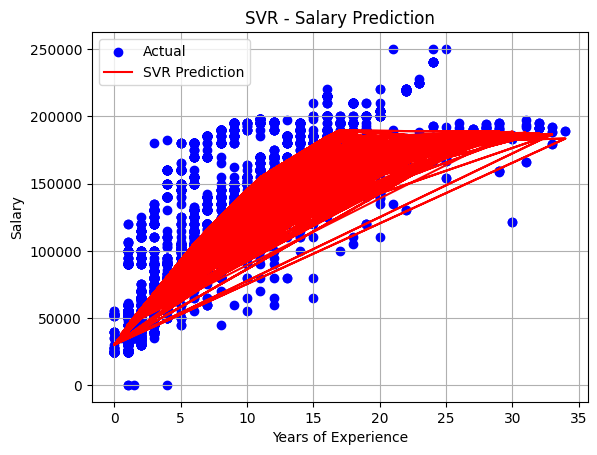

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='SVR Prediction')
plt.title("SVR - Salary Prediction")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()

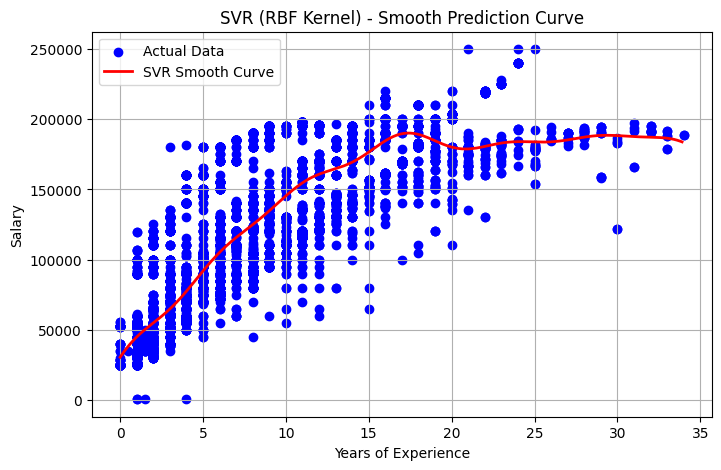

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a fine grid between min and max YearsExperience
X_grid = np.arange(min(X.ravel()), max(X.ravel()), 0.1)
X_grid = X_grid.reshape(-1, 1)

# Scale X_grid just like training data
X_grid_scaled = sc_X.transform(X_grid)

# Predict on the grid and inverse transform the results
y_grid_scaled = svr.predict(X_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1, 1))

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_grid, y_grid, color='red', label='SVR Smooth Curve', linewidth=2)
plt.title("SVR (RBF Kernel) - Smooth Prediction Curve")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()

Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y,y_pred)

print("MSE:",mse)
print("RMSE:",rmse)
print("R² Score:",r2)

MSE: 759013901.8514212
RMSE: 27550.20692937571
R² Score: 0.7275580175081495


Comparing Kernals Using Code

Kernel: LINEAR | R² Score: 0.6326


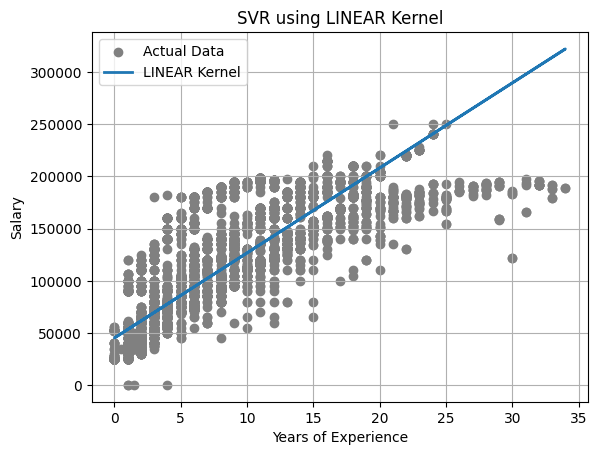

Kernel: POLY | R² Score: 0.0578


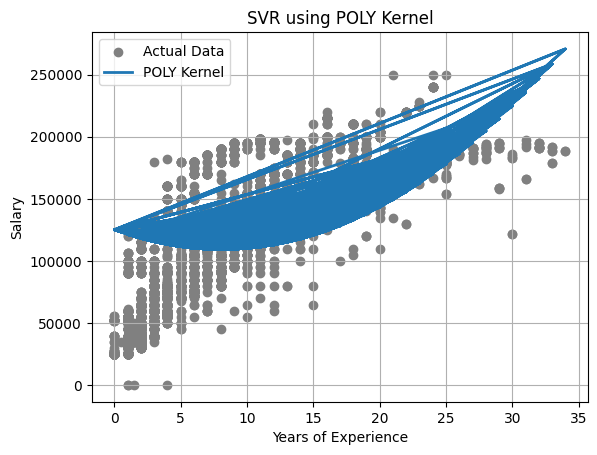

Kernel: RBF | R² Score: 0.7249


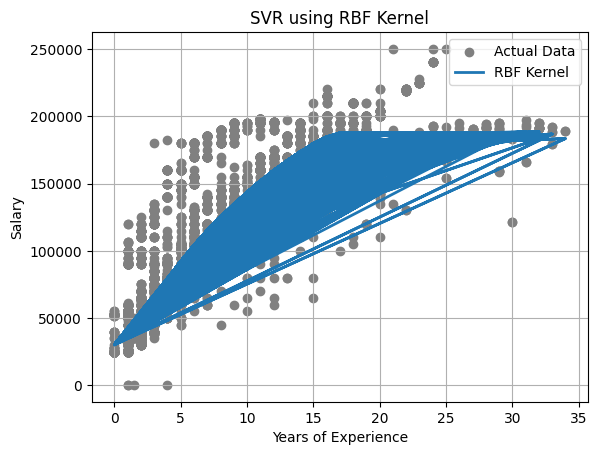

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. Load and scale data
X = df[['Years of Experience']].values
y = df[['Salary']].values

sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y).ravel()  # flatten y

# 2. Define kernels
kernels = ['linear', 'poly', 'rbf']

# 3. Train and evaluate each kernel
for kernel in kernels:
    if kernel == 'poly':
        model = SVR(kernel=kernel, degree=2)
    else:
        model = SVR(kernel=kernel)

    model.fit(X_scaled, y_scaled)

    # Predict for training data
    y_pred_scaled = model.predict(X_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

    # Evaluation
    score = r2_score(y, y_pred)
    print(f"Kernel: {kernel.upper()} | R² Score: {score:.4f}")

    # Plot (optional)
    plt.scatter(X, y, color='gray', label='Actual Data')
    plt.plot(X, y_pred, label=f'{kernel.upper()} Kernel', linewidth=2)
    plt.title(f'SVR using {kernel.upper()} Kernel')
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.grid(True)
    plt.legend()
    plt.show()


Deep Drive:Understanding C and epsilon in SVR

Try Different C and epsilon Values

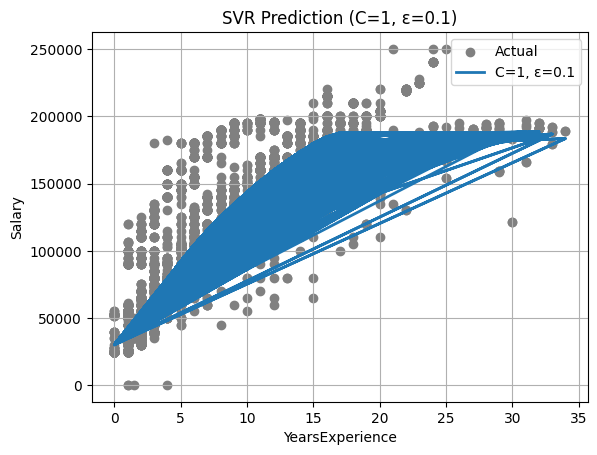

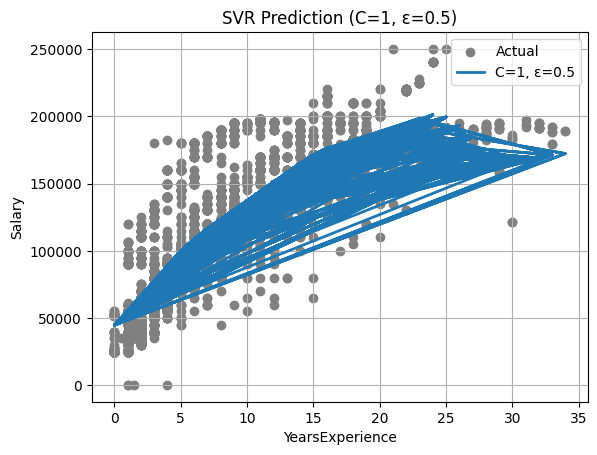

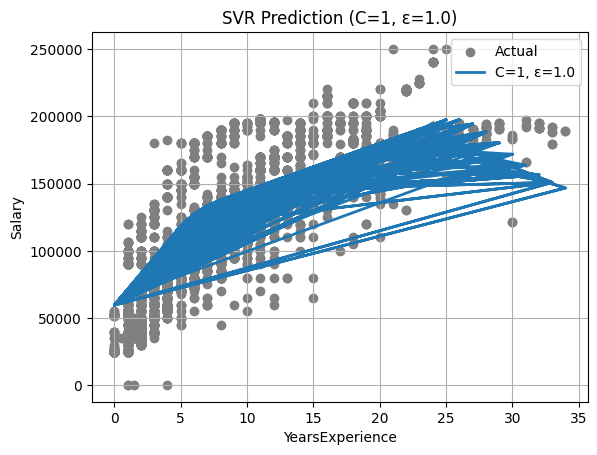

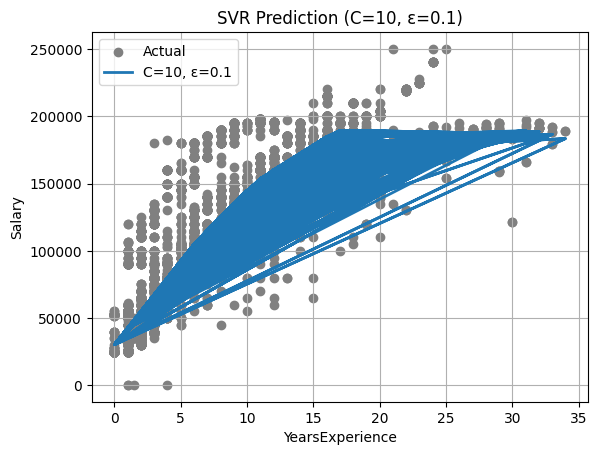

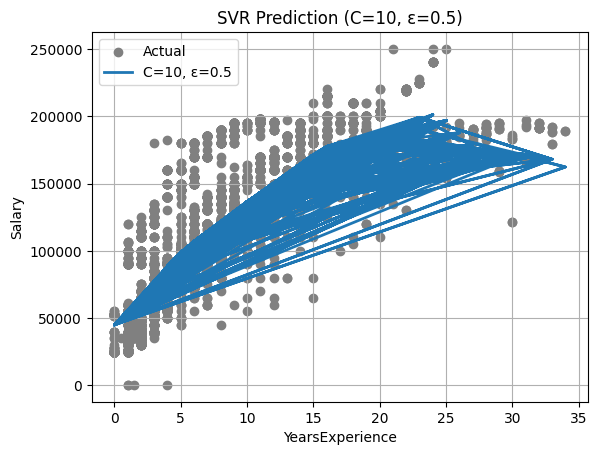

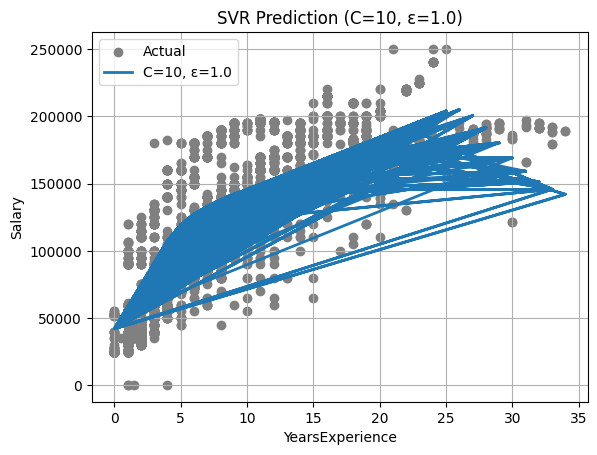

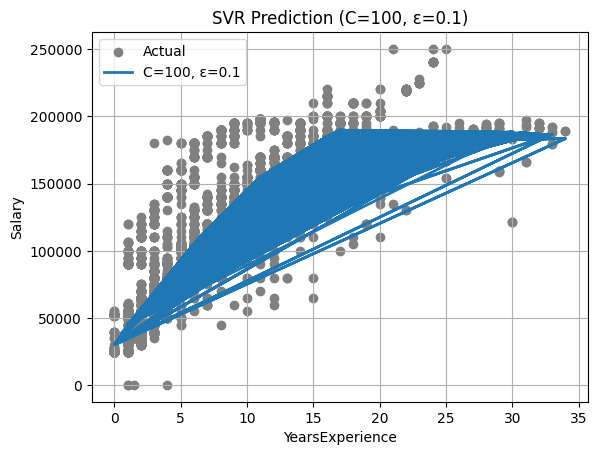

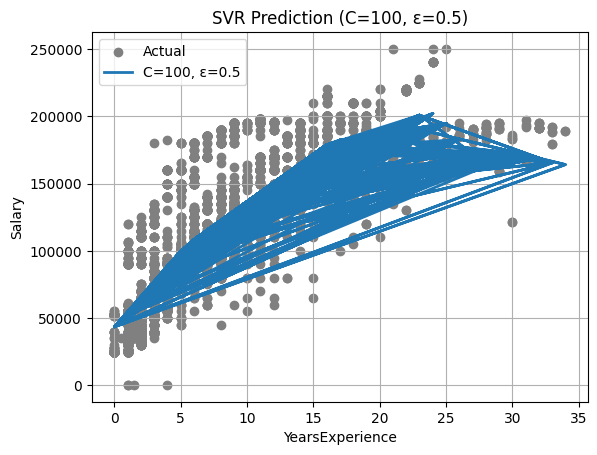

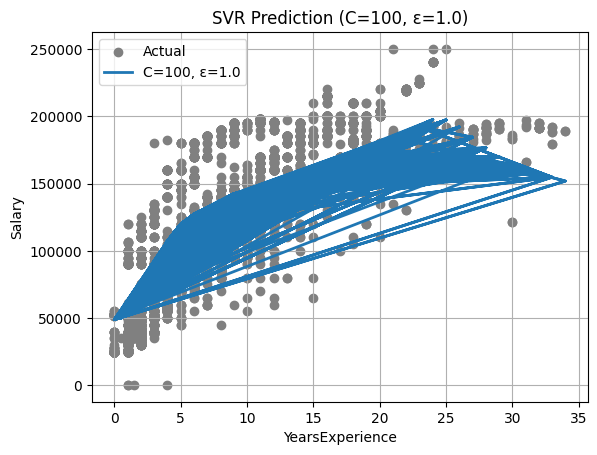

In [ ]:
C_values = [1, 10, 100]
epsilon_values = [0.1, 0.5, 1.0]

for c in C_values:
    for eps in epsilon_values:
        model = SVR(kernel='rbf', C=c, epsilon=eps)
        model.fit(X_scaled, y_scaled)
        y_pred = sc_y.inverse_transform(model.predict(X_scaled).reshape(-1, 1))

        plt.scatter(X, y, color='gray', label='Actual')
        plt.plot(X, y_pred, label=f'C={c}, ε={eps}', linewidth=2)
        plt.title(f'SVR Prediction (C={c}, ε={eps})')
        plt.xlabel("YearsExperience")
        plt.ylabel("Salary")
        plt.legend()
        plt.grid(True)
        plt.show()

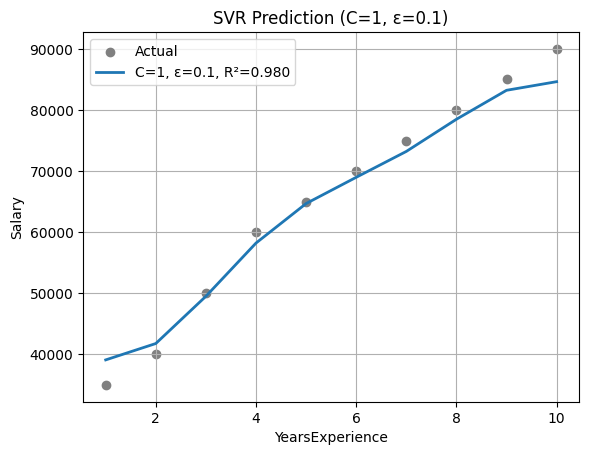

C=1, ε=0.1, R² Score = 0.980
  Predicted salary for 2 years: ₹41,776.46
  Predicted salary for 5 years: ₹64,689.43
  Predicted salary for 9 years: ₹83,226.81
--------------------------------------------------


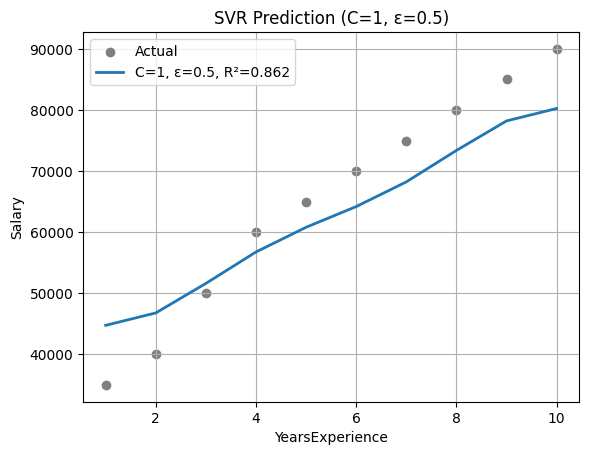

C=1, ε=0.5, R² Score = 0.862
  Predicted salary for 2 years: ₹46,785.38
  Predicted salary for 5 years: ₹60,805.22
  Predicted salary for 9 years: ₹78,214.62
--------------------------------------------------


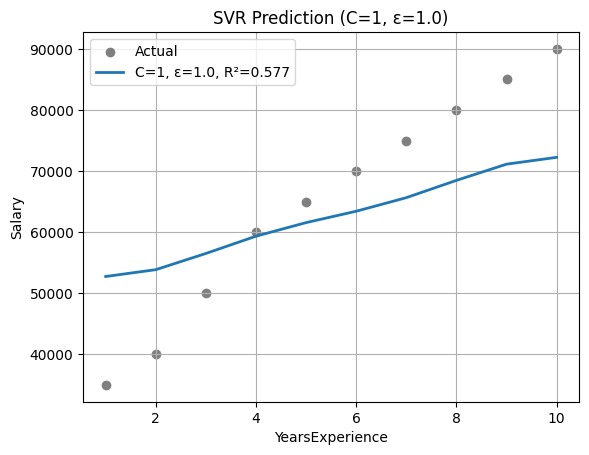

C=1, ε=1.0, R² Score = 0.577
  Predicted salary for 2 years: ₹53,865.14
  Predicted salary for 5 years: ₹61,568.75
  Predicted salary for 9 years: ₹71,134.86
--------------------------------------------------


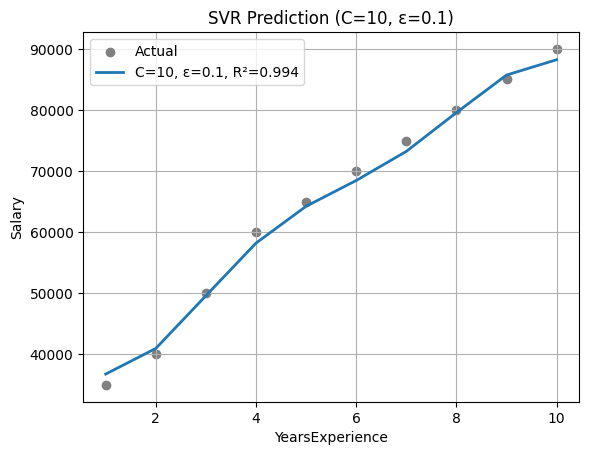

C=10, ε=0.1, R² Score = 0.994
  Predicted salary for 2 years: ₹40,972.33
  Predicted salary for 5 years: ₹64,243.15
  Predicted salary for 9 years: ₹85,721.24
--------------------------------------------------


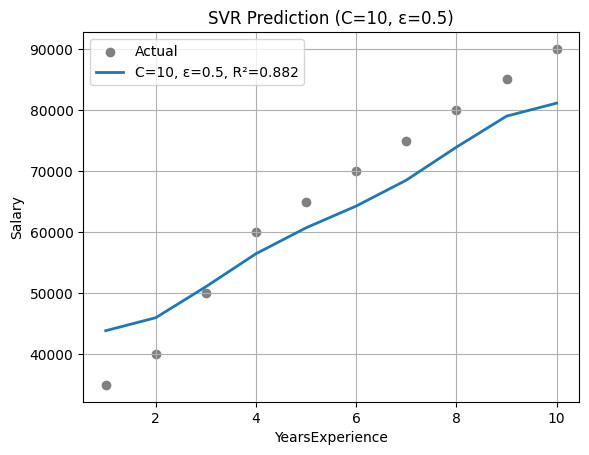

C=10, ε=0.5, R² Score = 0.882
  Predicted salary for 2 years: ₹46,007.40
  Predicted salary for 5 years: ₹60,721.32
  Predicted salary for 9 years: ₹78,992.60
--------------------------------------------------


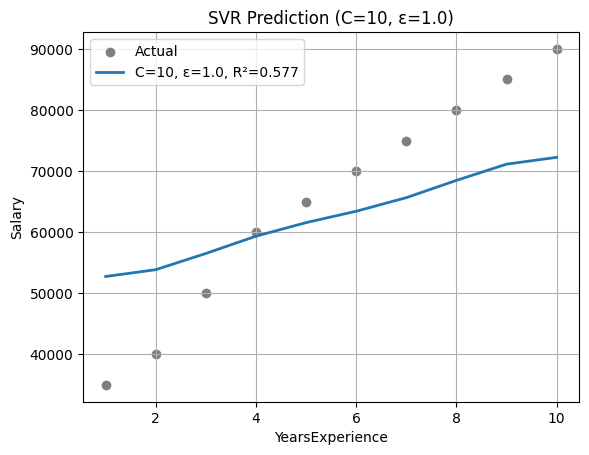

C=10, ε=1.0, R² Score = 0.577
  Predicted salary for 2 years: ₹53,865.14
  Predicted salary for 5 years: ₹61,568.75
  Predicted salary for 9 years: ₹71,134.86
--------------------------------------------------


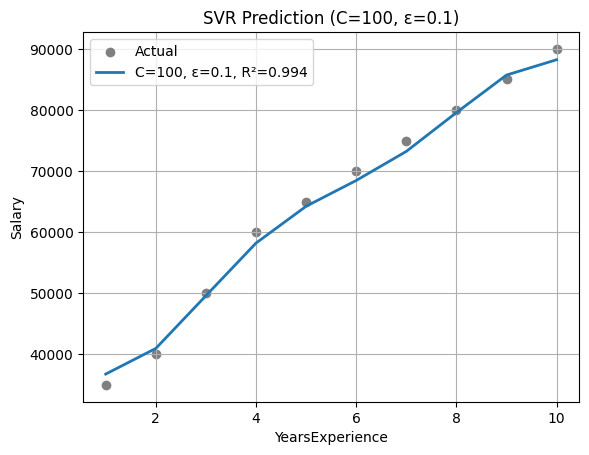

C=100, ε=0.1, R² Score = 0.994
  Predicted salary for 2 years: ₹40,972.33
  Predicted salary for 5 years: ₹64,243.15
  Predicted salary for 9 years: ₹85,721.24
--------------------------------------------------


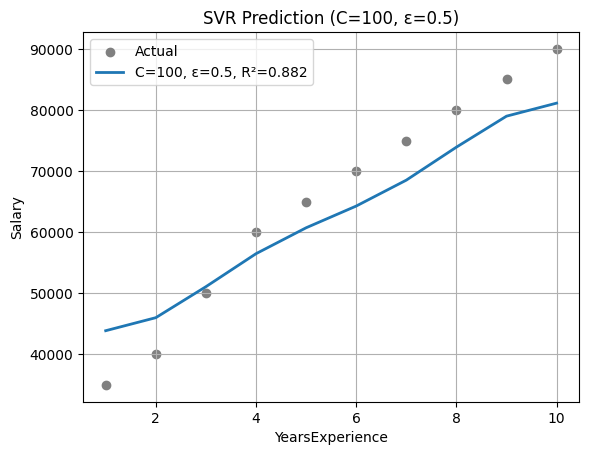

C=100, ε=0.5, R² Score = 0.882
  Predicted salary for 2 years: ₹46,007.40
  Predicted salary for 5 years: ₹60,721.32
  Predicted salary for 9 years: ₹78,992.60
--------------------------------------------------


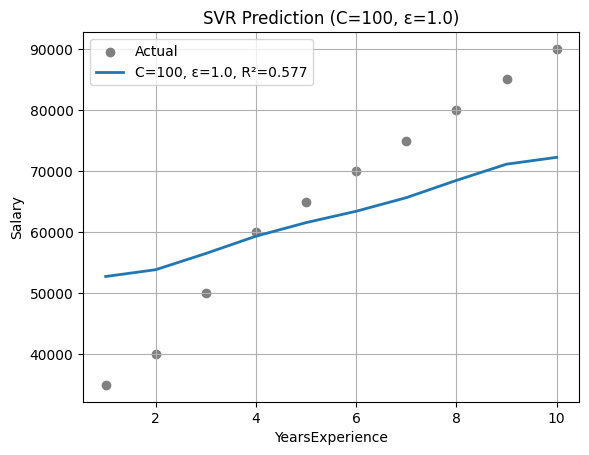

C=100, ε=1.0, R² Score = 0.577
  Predicted salary for 2 years: ₹53,865.14
  Predicted salary for 5 years: ₹61,568.75
  Predicted salary for 9 years: ₹71,134.86
--------------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([35000, 40000, 50000, 60000, 65000, 70000, 75000, 80000, 85000, 90000])


sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()


C_values = [1, 10, 100]
epsilon_values = [0.1, 0.5, 1.0]


test_years = np.array([[2], [5], [9]])
test_scaled = sc_X.transform(test_years)


for c in C_values:
    for eps in epsilon_values:
        model = SVR(kernel='rbf', C=c, epsilon=eps)
        model.fit(X_scaled, y_scaled)


        y_pred_scaled = model.predict(X_scaled)
        y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))


        test_pred_scaled = model.predict(test_scaled)
        test_pred = sc_y.inverse_transform(test_pred_scaled.reshape(-1, 1))


        r2 = r2_score(y, y_pred)


        plt.scatter(X, y, color='gray', label='Actual')
        plt.plot(X, y_pred, label=f'C={c}, ε={eps}, R²={r2:.3f}', linewidth=2)
        plt.title(f'SVR Prediction (C={c}, ε={eps})')
        plt.xlabel("YearsExperience")
        plt.ylabel("Salary")
        plt.legend()
        plt.grid(True)
        plt.show()


        print(f"C={c}, ε={eps}, R² Score = {r2:.3f}")
        print(f"  Predicted salary for 2 years: ₹{test_pred[0][0]:,.2f}")
        print(f"  Predicted salary for 5 years: ₹{test_pred[1][0]:,.2f}")
        print(f"  Predicted salary for 9 years: ₹{test_pred[2][0]:,.2f}")
        print("-" * 50)